未完待续

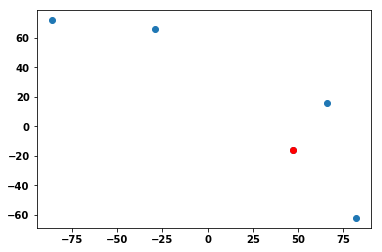

In [1]:
import pandas as pd
import numpy as np
import math
import time
import random
import matplotlib.pyplot as plt
from collections import defaultdict
from functools import wraps
from functools import lru_cache
import functools
%matplotlib inline

# 随机生成20个点
latitudes = [random.randint(-100, 100) for _ in range(5)]
longitude = [random.randint(-100, 100) for _ in range(5)]
plt.scatter(latitudes, longitude)
plt.scatter([latitudes[0]], [longitude[0]], color='r')

In [2]:
point_list = [(x, y) for x, y in zip(latitudes, longitude)]
point_list

[(47, -16), (82, -62), (-86, 72), (66, 16), (-29, 66)]

动态规划：
存子问题，查到表就跳过子问题（函数名一致，且不重复），没查到就求出最优解存表。

思路：
首先求出每2点之间的距离，

目的是整体距离的最优化，
一段距离之间的最佳值，是子问题。但是又不能掉入把累加最短距离的陷阱里。

子问题1:生成组合存在重复

子问题2:根据组合求解距离存在重复


In [3]:
distance = np.zeros((len(point_list), len(point_list)))

In [4]:
start_time = time.clock()
print(time.clock() - start_time)

0.000148000000000037


/Users/lingrowzhang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
/Users/lingrowzhang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [5]:
for x, point1 in  enumerate(point_list):
    for y, point2 in enumerate(point_list):
        dx = point1[0] - point2[0]
        dy = point1[1] - point2[1]
        distance[x,y] = np.sqrt((dx*dx) + (dy*dy))
distance

array([[  0.        ,  57.80138407, 159.47727111,  37.21558813,
        111.80339887],
       [ 57.80138407,   0.        , 214.89532336,  79.62411695,
        169.42549985],
       [159.47727111, 214.89532336,   0.        , 161.98765385,
         57.31491952],
       [ 37.21558813,  79.62411695, 161.98765385,   0.        ,
        107.35455277],
       [111.80339887, 169.42549985,  57.31491952, 107.35455277,
          0.        ]])

有两条路：   
1、所有的点转成了距离，求不相同点的组合值，切矩阵；    
2、找点，堆栈路线移动

In [6]:
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 35]
price = defaultdict(int)
for i, p in enumerate(original_price):
    price[i+1] = p
price

defaultdict(int,
            {1: 1,
             2: 5,
             3: 8,
             4: 9,
             5: 10,
             6: 17,
             7: 17,
             8: 20,
             9: 24,
             10: 30,
             11: 35})

In [7]:
def r(n):
    return max([price[n]] + [r(i) + r(n-i) for i in range(1, n)])
# 但是这句话太高级走捷径了，需要在另一个结构里使用，我也不太理解,想拆开看看怎么用
r(10)

30

In [8]:
def r(n):
    a = [price[n]] + [r(i) + r(n - i) for i in range(1, n)]
    print(a)
    return max(a)
r(10)

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[9, 9, 10, 9]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[9, 9, 10, 9]
[1]
[10, 11, 13, 13, 11]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[9, 9, 10, 9]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[9, 9, 10, 9]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[5, 2]
[1

[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[9, 9, 10, 9]
[1]
[1]
[1]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[9, 9, 10, 9]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[9, 9, 10, 9]
[1]
[10, 11, 13, 13, 11]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[9, 9, 10, 9]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[9, 9, 10, 9]
[1]
[1]
[5, 2]
[1

[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[9, 9, 10, 9]
[1]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[9, 9, 10, 9]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[9, 9, 10, 9]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[9, 9, 10, 9]
[1]
[10, 11, 13, 13, 11]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[9, 9, 10, 9]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[

[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[9, 9, 10, 9]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[9, 9, 10, 9]
[1]
[10, 11, 13, 13, 11]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[9, 9, 10, 9]
[1]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[9, 9, 10, 9]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[9, 9, 10, 9]
[1]
[1]
[5, 2

[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[9, 9, 10, 9]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[9, 9, 10, 9]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[9, 9, 10, 9]
[1]
[10, 11, 13, 13, 11]
[1]
[17, 14, 15, 16, 15, 14]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[9, 9, 10, 9]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[5, 2]
[1]
[1

[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[9, 9, 10, 9]
[1]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[9, 9, 10, 9]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[9, 9, 10, 9]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[9, 9, 10, 9]
[1]
[10, 11, 13, 13, 11]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[1]
[1]
[5, 2]
[1]
[1]
[5, 2]
[1]
[8, 6, 6]
[1]
[9, 9, 1

30

In [13]:
tmp = []
max_number = 0
def r(n):    
    for i in range(1, n):
        number = r(i) + r(n-i)
        tmp.append({price[n] : number})
    return max(tmp)
r(10)   
# 

ValueError: max() arg is an empty sequence

In [10]:
# # 首先暴力枚举是怎么做的：
# # 累加所有可能组合的距离，在最后在加上回到起点
# paths = {}
# the_path = []
# distance = defaultdict(int)
# def r_violence(n):
#     for i1 in range(1, n):
#         for i2 in range(1, n):
#             return min([distance[i1, i2] + []])
# 不去多余了解暴力，直接分析

In [11]:
# 先建存结果的表，步跨太大，搞不懂
result_tsp = defaultdict(int)
def memo(f):
    memo.already_computed = {}
    @wraps(f)
    def _wrap(arg):
        result = None
        if arg in memo.already_computed:
            args_key = memo.already_computed[arg]
        else:
            result = f(arg)
            memo.already_computed[arg] = result
    return result

In [12]:
call_time_with_arg = defaultdict(int)
def memo(f):
    memo.already_computed = {}

    @wraps(f)
    def _wrap(arg):
        result = None
        if arg in memo.already_computed:
            result = memo.already_computed[arg]
        else:
            result = f(arg)
            memo.already_computed[arg] = result
        return result
    return _wrap


# @get_call_time
solution = {}
@memo
def r(n):
    max_price, split_point = max(
        [(price[n], 0)] + [(r(i) + r(n - i), i) for i in range(1, n)], key=lambda x: x[0]
    )
    solution[n] = (split_point, n - split_point)
    return max_price

r(20)

60